# Lesson 1: Plotting

## Plotting Mathematical Functions in Python 📈
Plotting mathematical functions in Python involves using libraries such as `matplotlib` create graphical representations of mathematical relationships. This is useful for space applications as they often involve modeling physical phenomena such as orbits, trajectories, and celestial dynamics, where mathematical functions play a crucial role. 

### Example: Plotting sin(x) using matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt

The code below assigns a mathematical function in this case `sin(x)`. 

In [4]:
def f(x):
    return np.sin(x)

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)  # Generate 100 points between -2π and 2π
y = f(x)

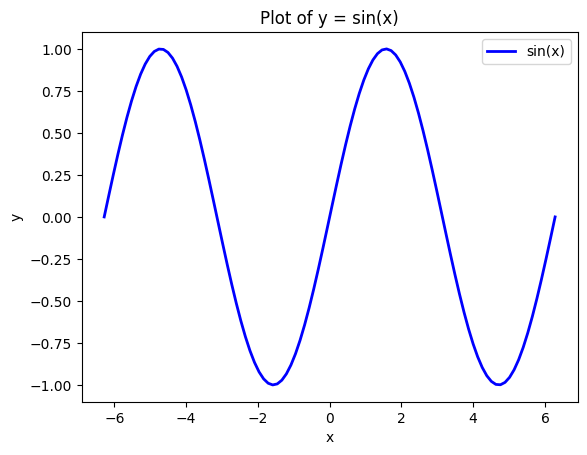

In [7]:
plt.plot(x, y, label='sin(x)', color='b', linestyle='-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()

### Example: Plotting Aircraft Telemetry using MatplotLib
In this example, we will be plotting real-world aircraft telemetry extracted from ADS-B (Automatic Dependent Surveillance Brodcast) which is a universal system for obtaining aircraft values such as airspeed, altitude, etc.

![https://preview.redd.it/im-so-impressed-with-ads-b-so-much-information-from-a-v0-rm824asa7xxa1.png?width=2035&format=png&auto=webp&s=c982da6a288f45e4b0411dab8a4126bb0cd7dd69](https://preview.redd.it/im-so-impressed-with-ads-b-so-much-information-from-a-v0-rm824asa7xxa1.png?width=2035&format=png&auto=webp&s=c982da6a288f45e4b0411dab8a4126bb0cd7dd69)

[Image Source](https://www.reddit.com/r/RTLSDR/comments/1387cjv/im_so_impressed_with_adsb_so_much_information/)

### Importing Libraries 

In [9]:
import json
import matplotlib.pyplot as plt

### Importing JSON Dataset
The following code opens the JSON file of the ADS-B data using the `open` function and then loads it into the `data` variable.
This dataset includes information for a flight with ID `QTR52F`

In [36]:
with open('adsb_dataset.json', 'r') as f:
        data = json.load(f)['trace']

### Filtering the Data
We want all flight logs that contain valid JSON data. The way we detect for this is by checking index `8` and seeing if there is a JSON object present.

In [48]:
filtered_data = []
for aircraft in data:
    if aircraft[8] != None:
        filtered_data.append(aircraft)

print(filtered_data[0])

[37.33, 29.83221, 48.044236, 38000, 371.0, 329.9, 0, 0, {'type': 'adsb_icao', 'flight': 'QTR52F  ', 'alt_geom': 38900, 'ias': 271, 'tas': 494, 'mach': 0.848, 'wd': 296, 'ws': 140, 'oat': -50, 'tat': -18, 'track': 329.91, 'track_rate': 0.0, 'roll': 0.35, 'mag_heading': 316.93, 'true_heading': 320.86, 'baro_rate': 0, 'geom_rate': 0, 'squawk': '2163', 'emergency': 'none', 'category': 'A5', 'nav_qnh': 1013.6, 'nav_altitude_mcp': 38016, 'nav_heading': 317.11, 'nic': 8, 'rc': 186, 'version': 2, 'nic_baro': 1, 'nac_p': 9, 'nac_v': 2, 'sil': 3, 'sil_type': 'perhour', 'gva': 2, 'sda': 2, 'alert': 0, 'spi': 0}, 'adsb_icao', 38900, 0, 271, 0.3]


### Display Aircraft Data

In [50]:
aircraft = filtered_data[0][8]
print(f"Flight {aircraft['flight']} Airspeed is {aircraft['tas']} knots")
print(aircraft)

Flight QTR52F   Airspeed is 494 knots
{'type': 'adsb_icao', 'flight': 'QTR52F  ', 'alt_geom': 38900, 'ias': 271, 'tas': 494, 'mach': 0.848, 'wd': 296, 'ws': 140, 'oat': -50, 'tat': -18, 'track': 329.91, 'track_rate': 0.0, 'roll': 0.35, 'mag_heading': 316.93, 'true_heading': 320.86, 'baro_rate': 0, 'geom_rate': 0, 'squawk': '2163', 'emergency': 'none', 'category': 'A5', 'nav_qnh': 1013.6, 'nav_altitude_mcp': 38016, 'nav_heading': 317.11, 'nic': 8, 'rc': 186, 'version': 2, 'nic_baro': 1, 'nac_p': 9, 'nac_v': 2, 'sil': 3, 'sil_type': 'perhour', 'gva': 2, 'sda': 2, 'alert': 0, 'spi': 0}


### Exploring ADS-B Data
The following table displays the information contained within the fields of ADS-B messages:

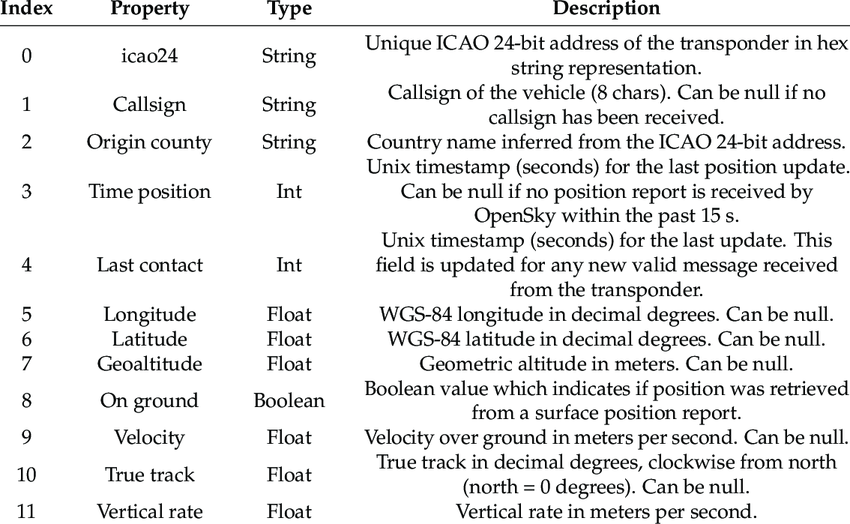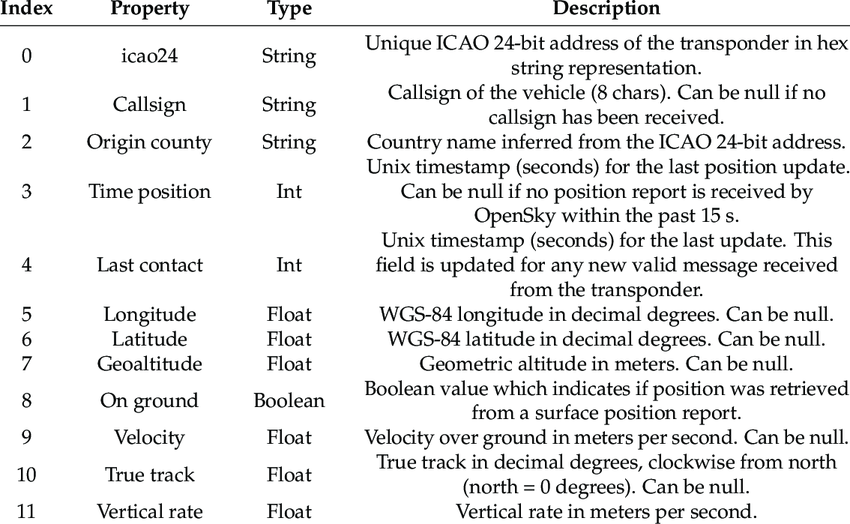

[Image Source](https://www.researchgate.net/figure/OpenSky-ADS-B-JSON-Object-Definition-35_tbl1_352469660)

You can get more information about the different ADS-B field at the following site:
[https://mode-s.org/decode/content/ads-b/1-basics.html](https://mode-s.org/decode/content/ads-b/1-basics.html)

### Choosing Telemetry 
Let's choose a specific ADS-B field that we want to plot over time. In this case, we will be plotting `tas` (True Air Speed). 
The following code goes through the data and collects the true airspeed values.

In [53]:
airspeeds = []
for entry in filtered_data:
    if 'tas' in entry[8]:
        airspeeds.append(entry[8]['tas'])
print(airspeeds[:5])

[494, 494, 494, 494, 496]


### Plotting Telemetry 
Now we can plot our airspeed values using `matplotlib`

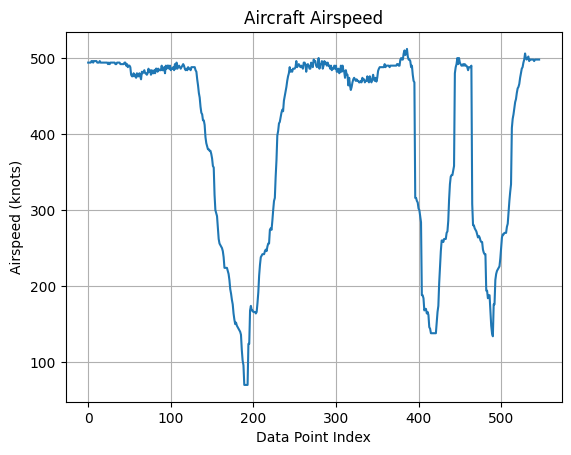

In [58]:
plt.plot(airspeeds)
plt.xlabel('Data Point Index')
plt.ylabel('Airspeed (knots)')
plt.title('Aircraft Airspeed')
plt.grid(True)
plt.show()

## Exercise 1: Spacecraft Thruster Telemetry Visualization

#### Objectives:
- Read in the `spacecraft_thruster.csv` file using `csv` and `csv.reader`
- Make an array titled `thrust_values` that contains only the thrust values of each row   
- Plot the data of `thrust_values` on a line chart using `matplotlib`

#### Hint:
- The column number for `time` is 0
- The column number for `thrust` is 2
- You can parse the str time values as date objects using the following code:
```
date_obj = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f')
```

In [60]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

## Using Models and Fitting with Astropy
Using models and fitting with Astropy involves leveraging the built-in functionality of the Astropy library to create mathematical models representing physical phenomena and fitting those models to observational data.

The below code is an example of fitting a 1D Gaussian curve to a simulated dataset:

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

### Generate Random Data

In [ ]:
rng = np.random.default_rng(0)
x = np.linspace(-5., 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += rng.normal(0., 0.2, x.shape)

### Fitting the Data using `Gaussian`

In [66]:
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

### Visualize the Data 

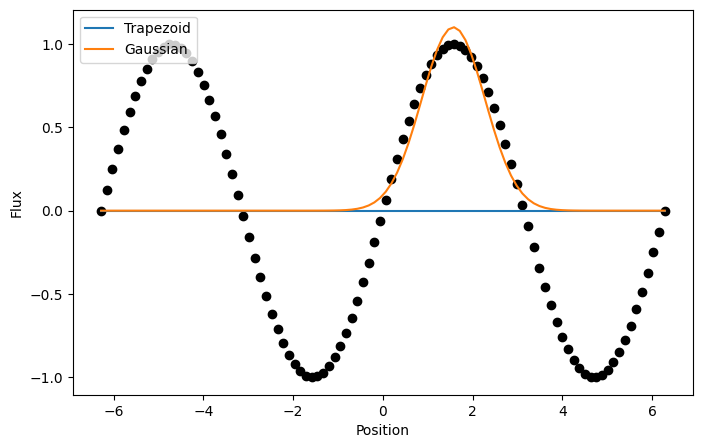

In [68]:
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, t(x), label='Trapezoid')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

## Physical Models in Astropy
Physical models in astropy are mathematical models that try to describe solutions to physical problems. These come in really helpful when we are trying to understand and simulate astrophysical phenomena.

## Black Body Radiation
The black body radiation model describes the electromagnetic radiation emitted by a perfect black body, which absorbs all radiation and emits radiation thermally depending on its temperature. The equation for black body radiation is known as Planck's law. The function is depicted as follows:

![https://www.physicsforums.com/attachments/03-png.235042/](https://www.physicsforums.com/attachments/03-png.235042)

[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.physicsforums.com%2Fthreads%2Fblack-body-radiation-plancks-law-derivation.961396%2F&psig=AOvVaw1iofDtJELofgfX9ZgjXfUv&ust=1711392786020000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCODCs5bJjYUDFQAAAAAdAAAAABAE)

Where the variables stand for:

`c`: speed of light in a vacuum

`k`: Boltzmann's constant

`T`: temperature of the black body

`v`: velocity of the particle

## Exercise 2: Modeling Black Body Radiation

#### Objectives:
- Import `numpy`, `BlackBody` from `astropy.modeling.models`, units from `astropy`, and quantity_support from `astropy.visualization`
- Create a BlackBody model with 3000K as the temperature and store it within the `black_body` variable
- Create a numpy range from 2000 to 200000 mm and store it within the `wavelengths` variable
- Obtain the flux by running `black_body(wavelengths)` and store it within `flux`
- Run the code below to test your model!

In [69]:
# WRITE YOUR CODE HERE

In [ ]:
with quantity_support():
    plt.figure()
    plt.semilogx(wav, flux)
    plt.axvline(bb.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    plt.show()

Congrats! You have now learned the basics of plotting and modeling mathematical models of physical phenomena using python libraries! In the next lesson, we will cover a library called `scipy`.